In [1]:
import pandas as pd
import numpy as np
import sklearn
import math
from  sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import math
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib
from sklearn.preprocessing import Binarizer
import sklearn
import math
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import time
import warnings

In [2]:
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import os
#import eli5
#from eli5.sklearn import PermutationImportance
from catboost import CatBoostClassifier

from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

Using TensorFlow backend.
C:\Users\SaurabhM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SaurabhM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SaurabhM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SaurabhM\Anaconda3\lib\site-packages\tensorflow\python\framewo

In [3]:
train=pd.read_csv(r"C:\Users\SaurabhM\Jupyter Project Files\My Works\HE_SellPrice\train.csv")
test=pd.read_csv(r"C:\Users\SaurabhM\Jupyter Project Files\My Works\HE_SellPrice\test.csv")
ss=pd.read_csv(r"C:\Users\SaurabhM\Jupyter Project Files\My Works\HE_SellPrice\sample_submission.csv")

In [4]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [5]:
train.shape

(6368, 15)

In [6]:
test.shape

(3430, 14)

In [7]:
ss.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968
2,NKCE6GJ5XVJDXNNZ,11871.830880
3,NKCEB8BK3ZXDHDHM,9421.143424
4,TOPEFDXSAHRNPF94,5717.420625


In [8]:
train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [9]:
test.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [10]:
train.Customer_name.nunique()

5900

In [11]:
train.Product_Category.nunique()

10

In [12]:
train = train.drop(["Product_id","instock_date","Customer_name"],axis = 1)

In [13]:
train.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [14]:
train.isnull().sum()

Stall_no              5
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [15]:
x=train[train["Selling_Price"].isnull()]

In [16]:
x

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
64,2.0,268,Yes,Hospitality,2,28,NaN,340.0,9.0,945.0,2956.0,NaN
516,7.0,447,Yes,Repair,0,36,1.0,219.0,3.0,5514.0,8055.0,NaN
536,45.0,14,No,Repair,0,37,0.0,268.0,3.0,3021.0,4135.0,NaN
1037,39.0,14,Yes,Repair,0,88,0.0,295.0,8.0,7314.0,NaN,NaN
1105,27.0,198,Yes,Technology,0,91,0.0,594.0,13.0,2138.0,3167.0,NaN
1211,10.0,447,No,Hospitality,0,4,0.0,205.0,7.0,3041.0,4063.0,NaN
1275,38.0,320,No,Educational,0,21,0.0,145.0,12.0,1860.0,5149.0,NaN
1460,15.0,80,Yes,Repair,0,58,0.0,273.0,3.0,1928.0,4193.0,NaN
1551,49.0,268,No,Technology,2,96,1.0,531.0,8.0,2892.0,9483.0,NaN
1679,32.0,91,Yes,Home_decor,0,79,1.0,285.0,NaN,2413.0,5683.0,NaN


In [17]:
train = train.drop(train[train.Selling_Price.isnull()].index)
train = train.drop(train[train.Selling_Price<0].index)

In [18]:
train.isnull().sum()

Stall_no              5
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price        38
Maximum_price       340
Selling_Price         0
dtype: int64

In [19]:
train.shape

(6313, 12)

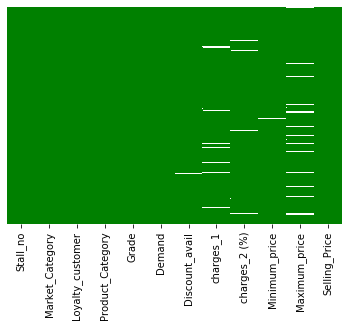

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='ocean')
plt.show()

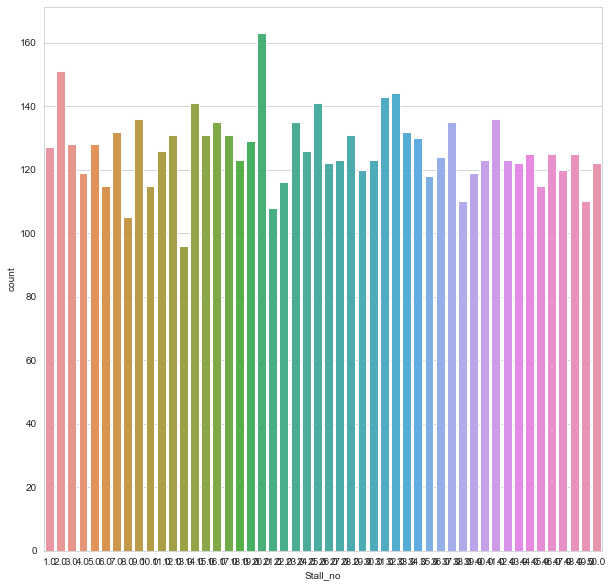

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.countplot(x="Stall_no",data=train)

In [22]:
train.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6308.000000,6313.000000,6313.000000,6313.000000,6276.000000,6116.000000,6109.000000,6275.000000,5973.000000,6313.000000
mean,25.318484,199.063520,0.644860,50.933787,0.140217,264.685088,10.152562,3534.967490,6438.011887,4581.963224
std,14.331591,170.291209,1.025945,29.085824,0.347239,124.567821,4.315713,2195.433264,3720.226452,2954.607090
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,36.000000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1881.500000,3922.000000,2461.266432
50%,25.000000,131.000000,0.000000,51.000000,0.000000,253.000000,10.000000,3165.000000,5639.000000,4215.972992
75%,37.000000,403.000000,2.000000,76.000000,0.000000,315.000000,14.000000,4705.000000,8132.000000,6171.778600
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [23]:
train = train.drop(train[train.Stall_no.isnull()].index)

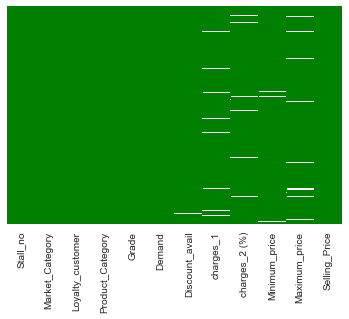

In [24]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='ocean')
plt.show()

In [25]:
train.isnull().sum()

Stall_no              0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price        38
Maximum_price       339
Selling_Price         0
dtype: int64

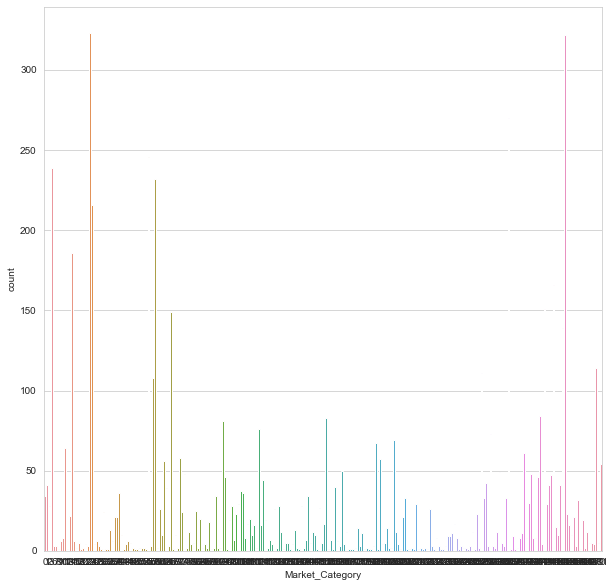

In [26]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.countplot(x="Market_Category",data=train)

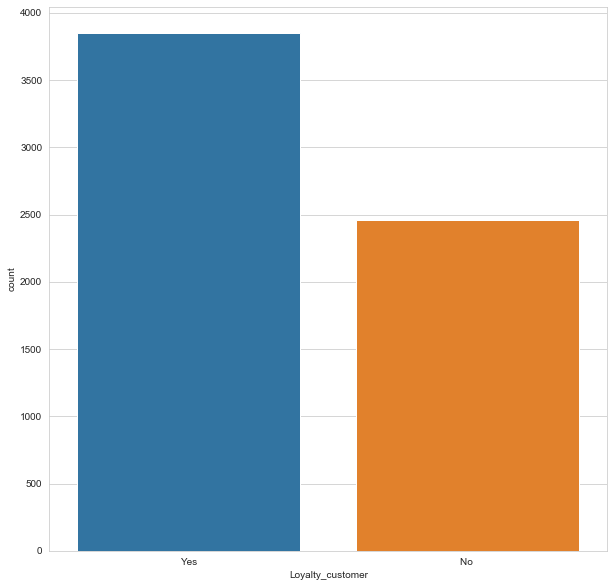

In [27]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.countplot(x="Loyalty_customer",data=train)

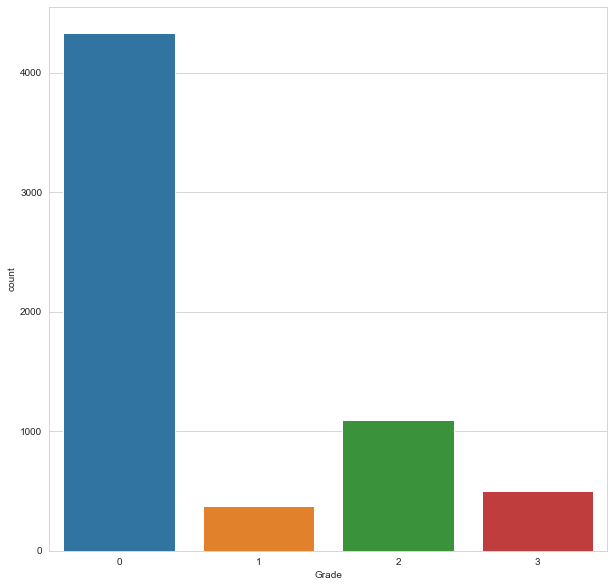

In [28]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.countplot(x="Grade",data=train)

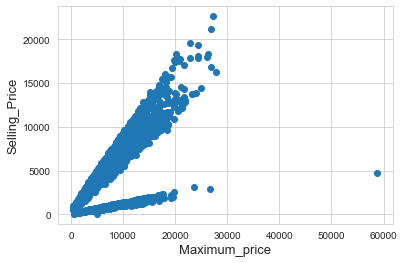

In [29]:
fig, ax = plt.subplots()
ax.scatter(x = train['Maximum_price'], y = train['Selling_Price'])
plt.ylabel('Selling_Price', fontsize=13)
plt.xlabel('Maximum_price', fontsize=13)
plt.show()

In [30]:
train = train.drop(train[train.Maximum_price>30000].index)

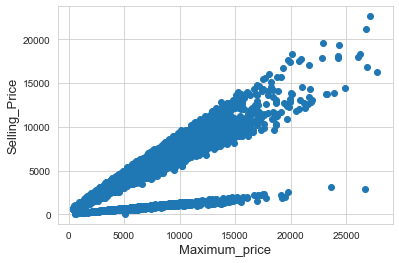

In [31]:
fig, ax = plt.subplots()
ax.scatter(x = train['Maximum_price'], y = train['Selling_Price'])
plt.ylabel('Selling_Price', fontsize=13)
plt.xlabel('Maximum_price', fontsize=13)
plt.show()

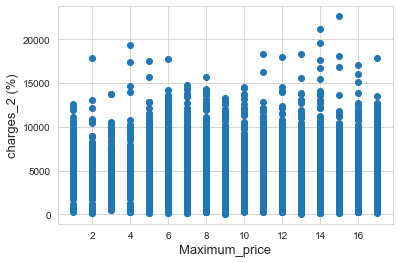

In [32]:
fig, ax = plt.subplots()
ax.scatter(x = train['charges_2 (%)'], y = train['Selling_Price'])
plt.ylabel('charges_2 (%)', fontsize=13)
plt.xlabel('Maximum_price', fontsize=13)
plt.show()

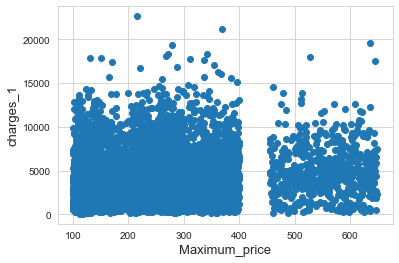

In [33]:
fig, ax = plt.subplots()
ax.scatter(x = train['charges_1'], y = train['Selling_Price'])
plt.ylabel('charges_1', fontsize=13)
plt.xlabel('Maximum_price', fontsize=13)
plt.show()

In [34]:
"""train['Loyalty_customer']=train['Loyalty_customer'].map({'No':0,'Yes':1})
train.head()"""

"train['Loyalty_customer']=train['Loyalty_customer'].map({'No':0,'Yes':1})\ntrain.head()"

In [35]:
train['Loyalty_customer'].value_counts()

Yes    3848
No     2459
Name: Loyalty_customer, dtype: int64

In [36]:
train['Loyalty_customer']=train['Loyalty_customer'].replace({'No ':2,'Yes':1})

In [37]:
train['Loyalty_customer'].value_counts()

1    3848
2    2459
Name: Loyalty_customer, dtype: int64

In [38]:
train['Product_Category'].value_counts()

Pet_care       674
Repair         664
Child_care     652
Cosmetics      642
Hospitality    625
Organic        617
Technology     616
Home_decor     609
Educational    605
Fashion        603
Name: Product_Category, dtype: int64

In [39]:
train['Product_Category']=train['Product_Category'].replace({'Pet_care':1,'Repair':2,'Child_care':3,'Cosmetics':4,'Hospitality':5,'Organic':6,'Technology':7,'Home_decor':8,'Educational':9,'Fashion':10})

In [40]:
train['Product_Category'].value_counts()

1     674
2     664
3     652
4     642
5     625
6     617
7     616
8     609
9     605
10    603
Name: Product_Category, dtype: int64

In [41]:
test['Product_Category']=test['Product_Category'].replace({'Pet_care':1,'Repair':2,'Child_care':3,'Cosmetics':4,'Hospitality':5,'Organic':6,'Technology':7,'Home_decor':8,'Educational':9,'Fashion':10})
test['Loyalty_customer']=test['Loyalty_customer'].replace({'No ':2,'Yes':1})

In [42]:
id=test["Product_id"]
test = test.drop(["Product_id","instock_date","Customer_name"],axis = 1)
test.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,39.0,205,2,10,0,90,0,380.0,16.0,2576.0,3340
1,49.0,3,1,10,0,87,0,393.0,16.0,1202.0,1955
2,1.0,183,2,7,2,55,0,493.0,9.0,7175.0,15715
3,8.0,358,1,3,3,86,0,303.0,16.0,5404.0,13078
4,33.0,167,2,7,0,27,0,567.0,16.0,4069.0,6244


In [43]:
train.isnull().sum()

Stall_no              0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price        38
Maximum_price       339
Selling_Price         0
dtype: int64

<Figure size 1080x1080 with 0 Axes>

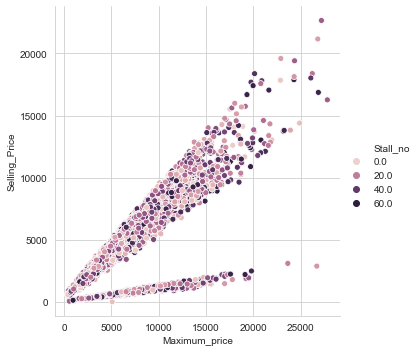

In [44]:
plt.figure(figsize=(15,15))
sns.relplot(x="Maximum_price", y="Selling_Price", hue="Stall_no",data=train)
plt.show()

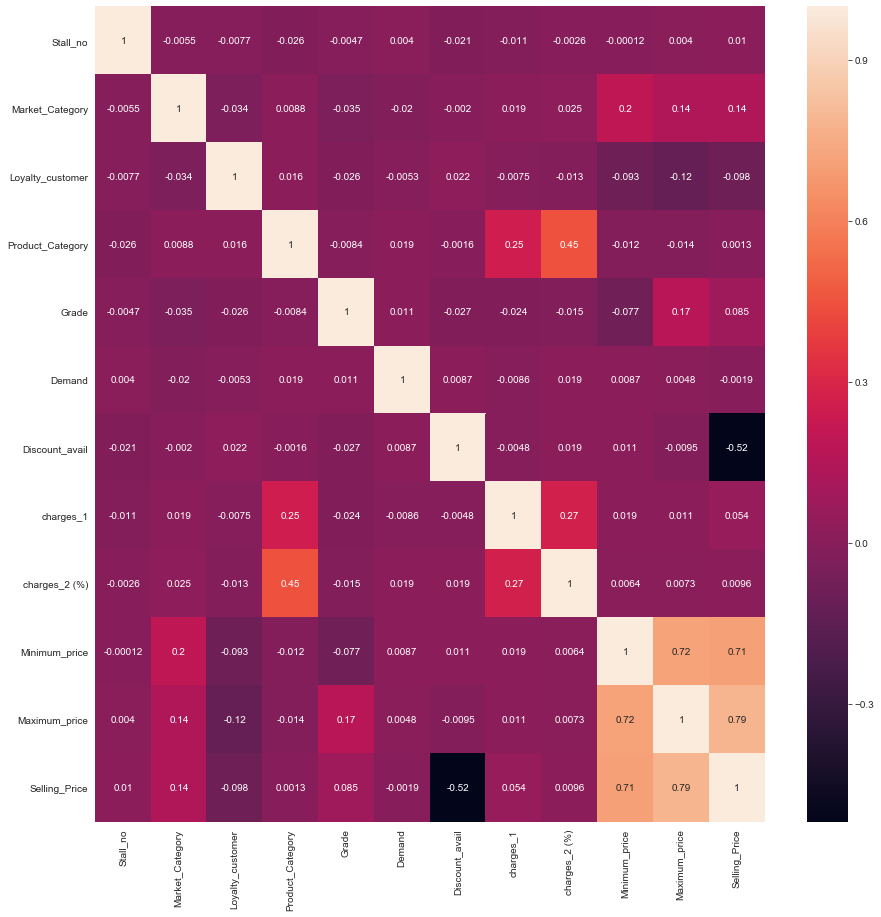

In [45]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)

In [46]:
train.Market_Category.value_counts()

23     323
452    322
358    270
55     246
3      239
      ... 
208      1
210      1
214      1
168      1
248      1
Name: Market_Category, Length: 248, dtype: int64

In [47]:
train.Market_Category.nunique()

248

In [48]:
train.Grade.nunique()

4

In [49]:
train.Maximum_price = train.groupby('Market_Category')['Maximum_price'].apply(lambda x: x.fillna(x.mean()))


In [50]:
train.head(20)

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2,1,10,1,68,0.0,376.0,11.0,2983.0,4713.000000,4185.947700
1,38.0,24,1,10,0,51,0.0,397.0,12.0,7495.0,10352.000000,9271.490256
2,9.0,447,1,3,0,10,0.0,250.0,9.0,5752.0,7309.000000,6785.701362
3,50.0,23,1,9,2,48,0.0,144.0,13.0,5090.0,20814.000000,13028.917824
4,7.0,63,1,2,1,35,1.0,211.0,4.0,2430.0,9261.000000,906.553935
5,23.0,162,2,7,1,49,0.0,633.0,6.0,3959.0,6104.000000,5631.247872
6,33.0,462,2,4,3,57,0.0,263.0,13.0,2006.0,5257.000000,3874.264992
7,4.0,23,1,9,1,67,0.0,104.0,15.0,3596.0,5921.000000,4820.943600
8,26.0,156,1,3,0,53,0.0,310.0,6.0,6965.0,10194.000000,8837.724240
9,5.0,275,1,3,0,84,1.0,321.0,8.0,1103.0,5430.000000,530.761862


In [51]:
train.isnull().sum()

Stall_no              0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price        38
Maximum_price         2
Selling_Price         0
dtype: int64

In [52]:
train.shape

(6307, 12)

In [53]:
train.Maximum_price = train.Maximum_price.fillna(train.Maximum_price.mean())

In [54]:
train.isnull().sum()

Stall_no              0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price        38
Maximum_price         0
Selling_Price         0
dtype: int64

In [55]:
train.Minimum_price = train.groupby('Market_Category')['Minimum_price'].apply(lambda x: x.fillna(x.mean()))

In [56]:
train.isnull().sum()

Stall_no              0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price         0
Maximum_price         0
Selling_Price         0
dtype: int64

In [57]:
train["charges_2 (%)"] = train.groupby('Product_Category')["charges_2 (%)"].apply(lambda x: x.fillna(x.mean()))

In [58]:
train.isnull().sum()

Stall_no              0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)         0
Minimum_price         0
Maximum_price         0
Selling_Price         0
dtype: int64

In [59]:
train["charges_1"] = train.groupby('Product_Category')["charges_1"].apply(lambda x: x.fillna(x.mean()))

In [60]:
train.Discount_avail = train.groupby('Market_Category')['Discount_avail'].apply(lambda x: x.fillna(x.mean()))

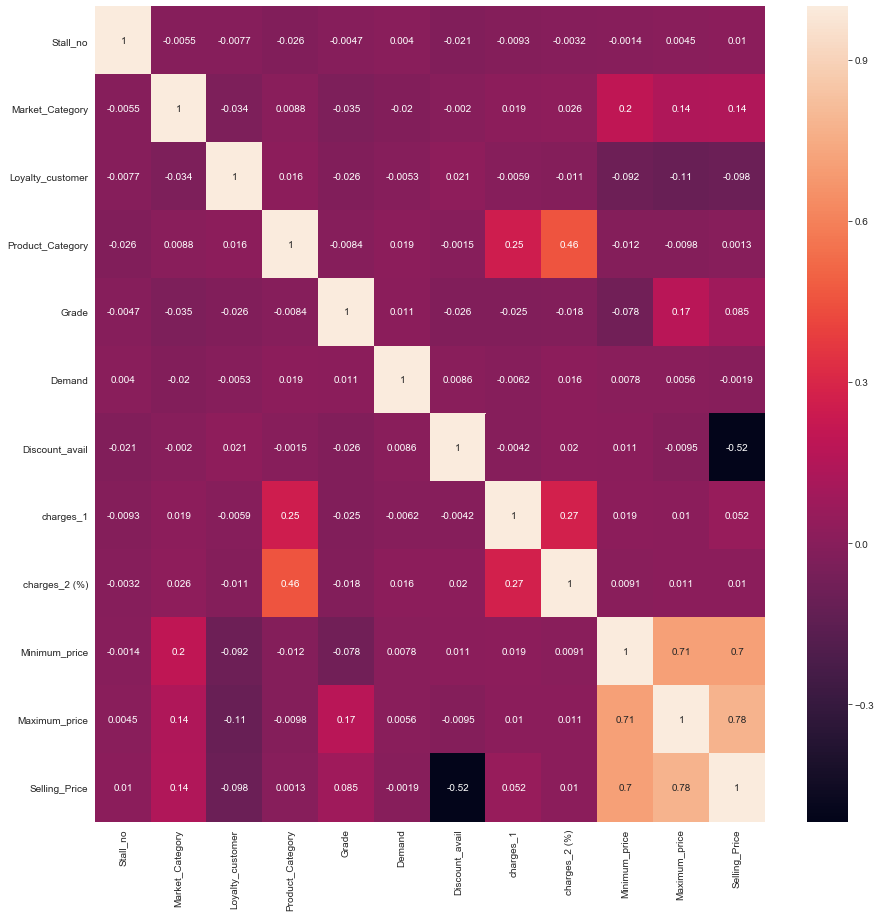

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)

In [62]:
train.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2,1,10,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,24,1,10,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,447,1,3,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,23,1,9,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,63,1,2,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [63]:
train.isnull().sum()

Stall_no            0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

In [64]:
test.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,39.0,205,2,10,0,90,0,380.0,16.0,2576.0,3340
1,49.0,3,1,10,0,87,0,393.0,16.0,1202.0,1955
2,1.0,183,2,7,2,55,0,493.0,9.0,7175.0,15715
3,8.0,358,1,3,3,86,0,303.0,16.0,5404.0,13078
4,33.0,167,2,7,0,27,0,567.0,16.0,4069.0,6244


In [65]:
test.isnull().sum()

Stall_no             1
Market_Category      0
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [66]:
test["charges_1"] = test.groupby('Product_Category')["charges_1"].apply(lambda x: x.fillna(x.mean()))
test.Minimum_price = test.groupby('Market_Category')['Minimum_price'].apply(lambda x: x.fillna(x.mean()))
test["charges_2 (%)"] = test.groupby('Product_Category')["charges_2 (%)"].apply(lambda x: x.fillna(x.mean()))
test.Stall_no = test.groupby('Market_Category')['Stall_no'].apply(lambda x: x.fillna(x.mean()))


In [67]:
test.isnull().sum()

Stall_no            0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
dtype: int64

In [68]:
train.shape

(6307, 12)

In [69]:
test.shape

(3430, 11)

In [70]:
y=train['Selling_Price']
train=train.drop(['Selling_Price'],axis=1)

In [71]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [72]:
#train=normalize(train)

In [73]:
#test=normalize(test)

In [74]:
x_train, x_val, y_train, y_val = train_test_split(train, y,test_size = 0.22,random_state =205)



In [83]:
y_train.describe()

count     4919.000000
mean      4582.107671
std       2964.504902
min         82.252665
25%       2455.400277
50%       4205.929728
75%       6177.373884
max      22638.325941
Name: Selling_Price, dtype: float64

In [82]:
x_val.describe()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,25.090778,197.301153,1.382565,5.440202,0.654899,49.747118,0.138544,266.654364,10.279845,3537.414280,6420.138291
std,14.285395,168.429923,0.486189,2.866413,1.030080,29.330824,0.344480,126.606999,4.170353,2137.715372,3603.192389
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,100.000000,1.000000,124.000000,485.000000
25%,13.000000,55.000000,1.000000,3.000000,0.000000,24.750000,0.000000,165.000000,7.000000,1897.000000,3980.750000
50%,25.000000,133.000000,1.000000,5.000000,0.000000,49.000000,0.000000,252.000000,10.938270,3219.500000,5646.000000
75%,37.250000,358.000000,2.000000,8.000000,2.000000,75.000000,0.000000,312.500000,14.000000,4666.500000,7927.750000
max,50.000000,471.000000,2.000000,10.000000,3.000000,100.000000,1.000000,644.000000,17.000000,15034.000000,22915.000000


In [84]:
y_val.describe()

count     1388.000000
mean      4579.404548
std       2922.045936
min         36.000000
25%       2483.418516
50%       4244.021058
75%       6136.311906
max      19586.969850
Name: Selling_Price, dtype: float64

In [85]:
x_train.describe()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
count,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000
mean,25.378736,199.446432,1.391950,5.379345,0.642814,51.255133,0.140564,264.787607,10.113496,3534.036677,6423.901326
std,14.344122,170.783933,0.488235,2.885723,1.025243,29.001615,0.346760,123.946212,4.318297,2205.909696,3600.522197
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000
25%,13.000000,55.000000,1.000000,3.000000,0.000000,26.000000,0.000000,162.000000,7.000000,1881.000000,3959.000000
50%,25.000000,129.000000,1.000000,5.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3153.000000,5703.000000
75%,37.000000,403.000000,2.000000,8.000000,2.000000,77.000000,0.000000,315.000000,14.000000,4712.000000,8069.000000
max,50.000000,471.000000,2.000000,10.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,27827.000000


In [79]:
x_train.isnull().sum()

Stall_no            0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
dtype: int64

In [80]:
poly_reg = PolynomialFeatures(degree = 5,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_train, y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.021,max_iter=200)
lin_reg_1.fit(X_poly, y_train)

# predicitng 
pred_val = lin_reg_1.predict(poly_reg.fit_transform(x_val))

print(r2_score(y_val, pred_val))
mse = sklearn.metrics.mean_squared_log_error(y_val, pred_val)
rmse = math.sqrt(mse)
print(rmse)

0.9851436636334138
0.16098132398503595


In [86]:
from xgboost import XGBRegressor

my_model_XGB = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model_XGB.fit(x_train, y_train, verbose=False)

# make predictions
pred = abs(my_model_XGB.predict(x_val))
print(r2_score(y_val, pred))
mse = sklearn.metrics.mean_squared_log_error(y_val, pred)
rmse = math.sqrt(mse)
print(rmse)

[00:36:31] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9837597747932308
0.18085221041934285


In [87]:
# XGBoost
pred_test_2=abs(my_model_XGB.predict(test))

In [88]:
pred_test_2

array([ 3313.3318,  1879.1948, 11345.394 , ...,  6407.372 ,  3443.6296,
        1046.3093], dtype=float32)

In [89]:
submission = pd.DataFrame({'ID': id,
                           'Upvotes':pred_test_2
                           })

In [90]:
submission.to_csv(r"C:\Users\SaurabhM\Jupyter Project Files\My Works\HE_SellPrice\ss.csv",index=False)
